In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


d:\virt_dev_2\venv_2\Scripts\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X = boston.drop(['target'], axis=1)
y = boston['target']

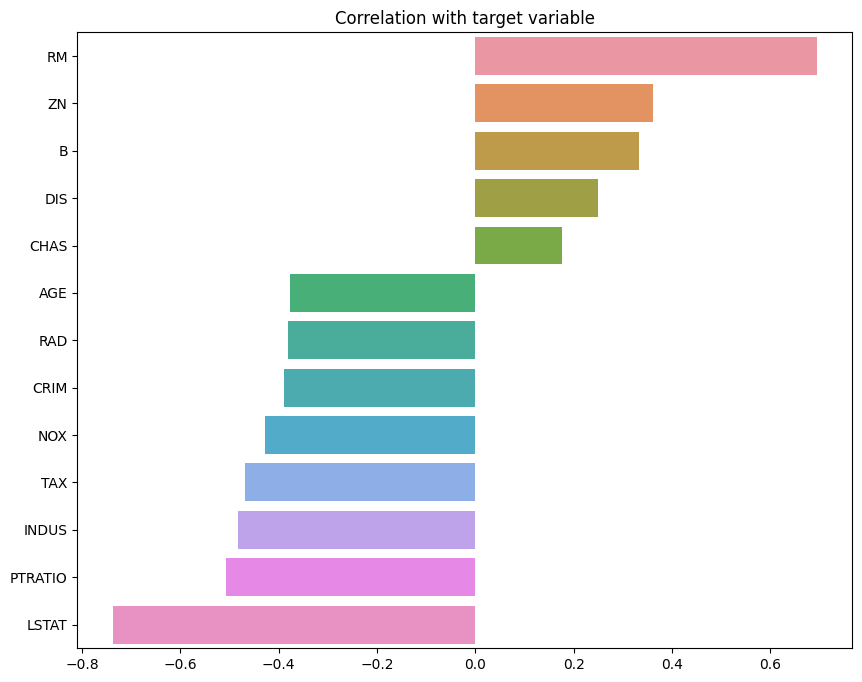

In [9]:
corr_with_target = boston.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [10]:
# Масштабирование
X_sc = StandardScaler().fit(X).transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [12]:
results = pd.DataFrame() # сводная таблица результатов
n_layers = [] # число слоев
n_nums = [] # число нейронов
act_func = [] # функция активации
opt = [] # оптимизатор
train_mse = [] # ошибка на тренировочной выборке
test_mse = [] # ошибка на тестовой выборке

Будем проверять следующие значения:<br>
<!-- n_layers: 3, 5 и 10 <br>
n_nums: 8, 32 и 128 <br> -->
n_layers: 4, 6 и 12 <br>
n_nums: 10, 40 и 150 <br>
act_func: ReLU, sigmoid и tanh <br>
opt: RMSProp и Adam<br>



Параметры текущей нейронной сети: 4 слоя, 10 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 34.4013 - mse: 34.4013 - 68ms/epoch - 6ms/step
5/5 - 0s - loss: 50.2230 - mse: 50.2230 - 62ms/epoch - 12ms/step

Параметры текущей нейронной сети: 4 слоя, 10 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 31.2817 - mse: 31.2817 - 71ms/epoch - 6ms/step
5/5 - 0s - loss: 44.5799 - mse: 44.5799 - 49ms/epoch - 10ms/step

Параметры текущей нейронной сети: 4 слоя, 10 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 313.3947 - mse: 313.3947 - 65ms/epoch - 5ms/step
5/5 - 0s - loss: 291.2416 - mse: 291.2416 - 55ms/epoch - 11ms/step

Параметры текущей нейронной сети: 4 слоя, 10 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 336.5060 - mse: 336.5060 - 55ms/epoch - 5ms/step
5/5 - 0s - loss: 313.6889 - mse: 313.6889 - 48ms/epoch - 10ms/step

Параметры текущей нейронной сети: 4 слоя, 10 нейронов, 

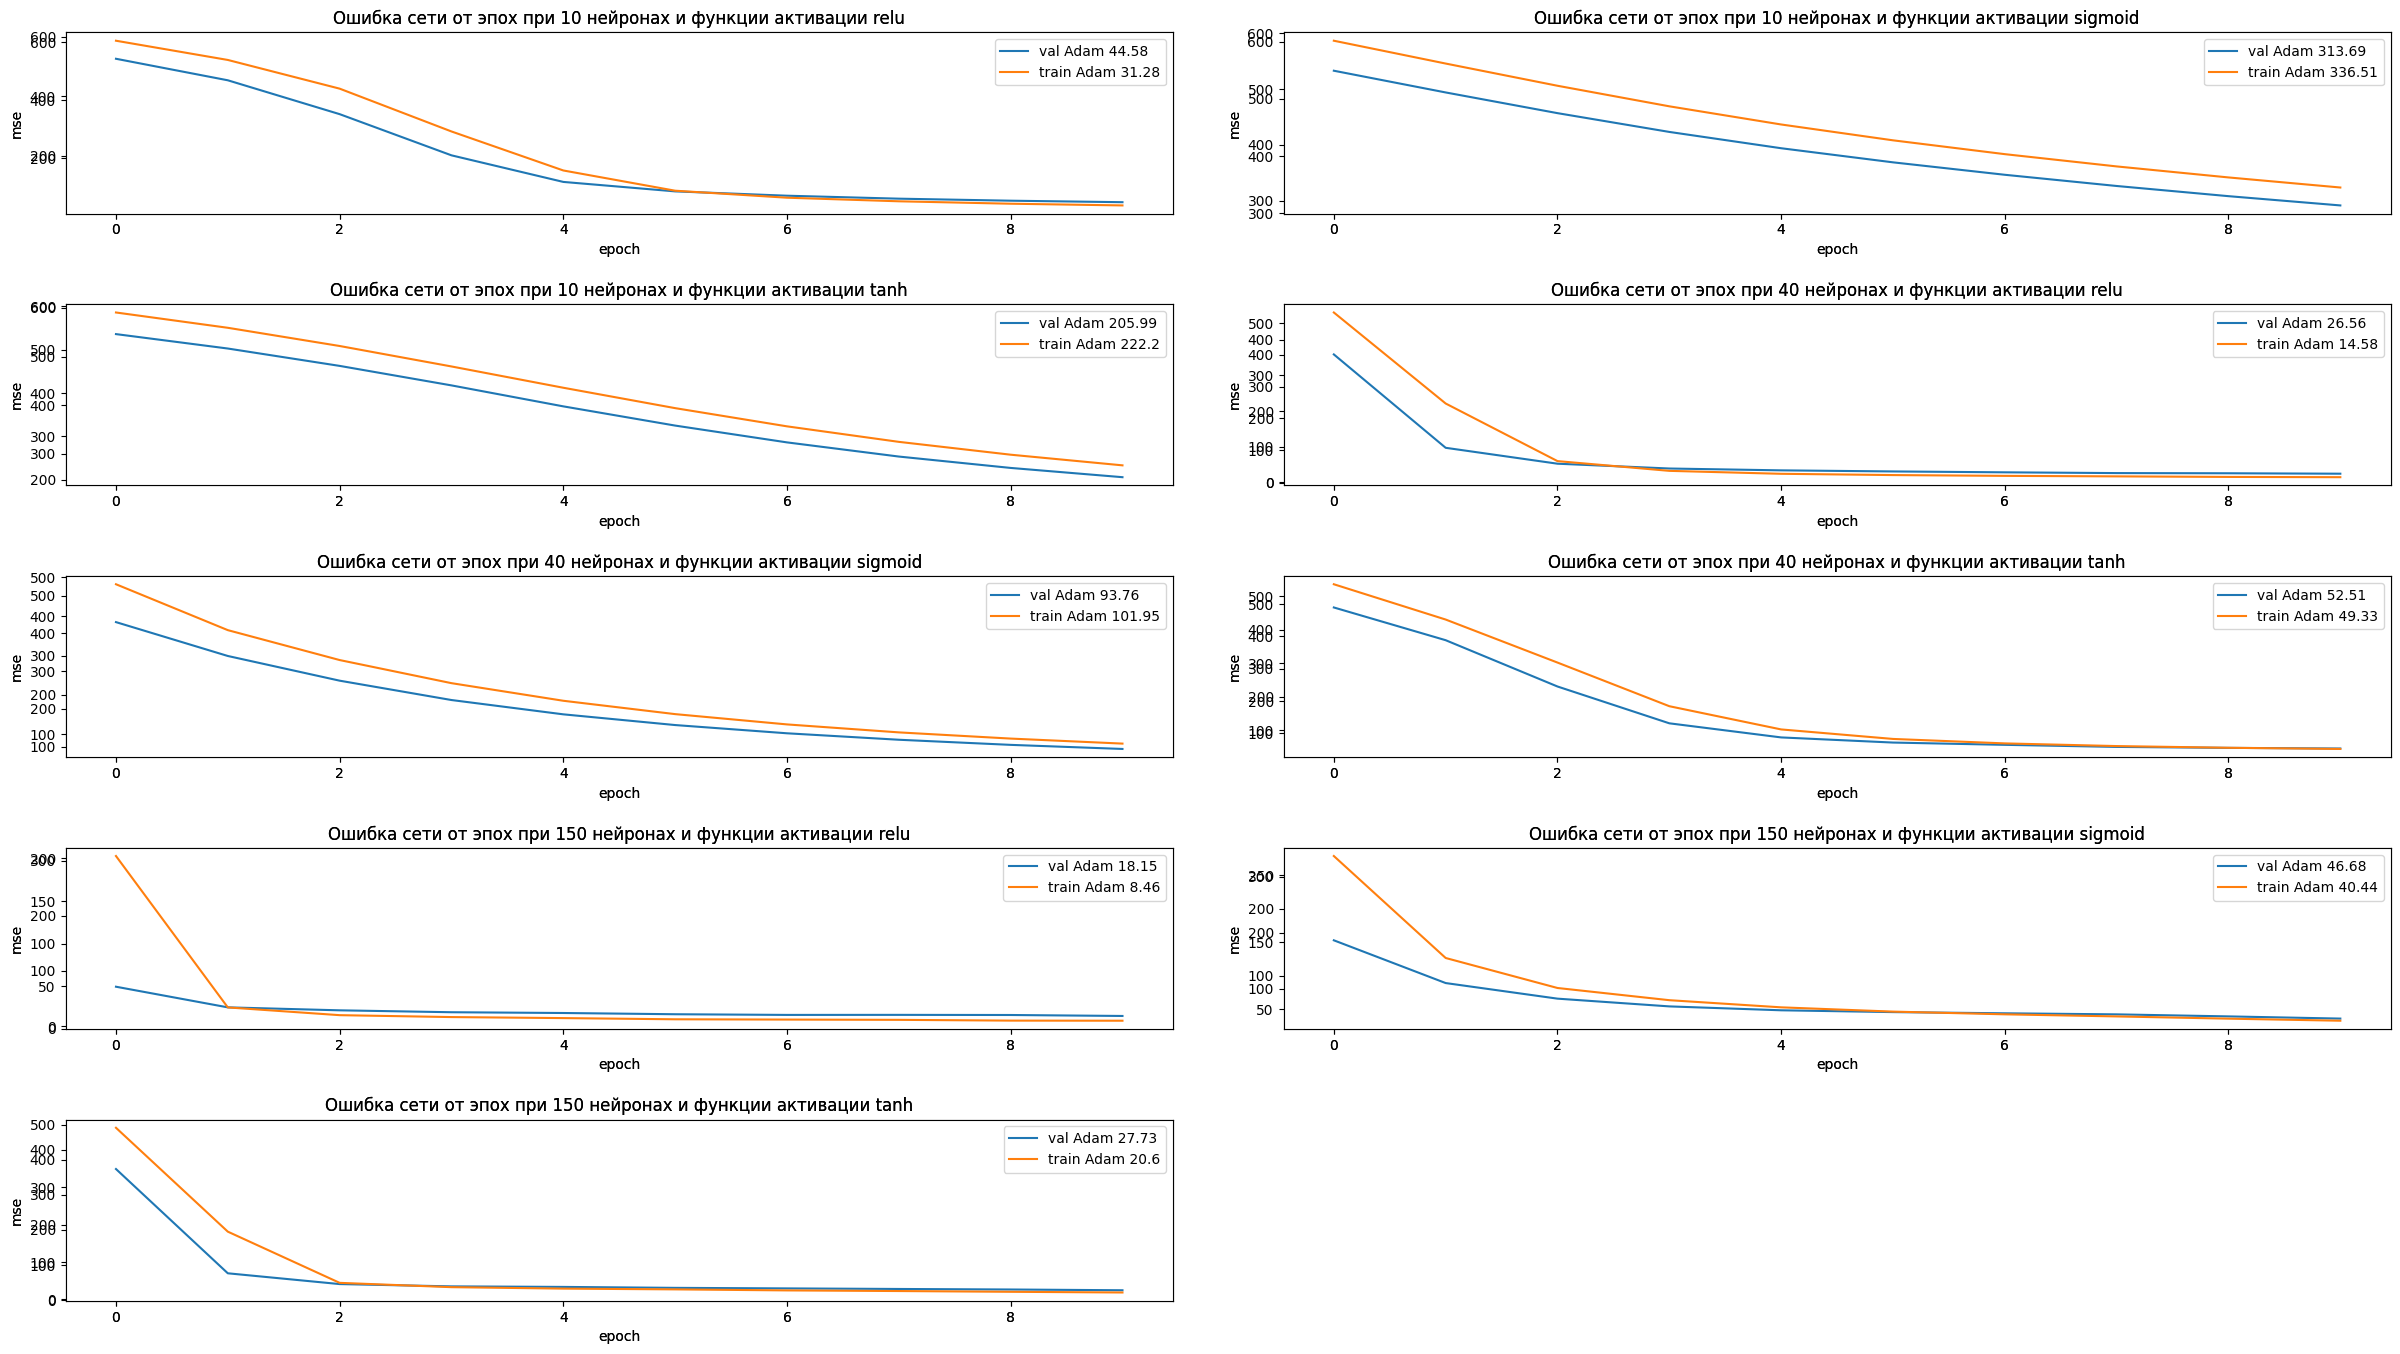

In [13]:
# Рассмотрим 4-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [10, 40, 150]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(4)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 4 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      outputs = Dense(1)(x_3)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 6 слоёв, 10 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 17.9559 - mse: 17.9559 - 57ms/epoch - 5ms/step
5/5 - 0s - loss: 30.1518 - mse: 30.1518 - 42ms/epoch - 8ms/step

Параметры текущей нейронной сети: 6 слоёв, 10 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 16.6802 - mse: 16.6802 - 72ms/epoch - 6ms/step
5/5 - 0s - loss: 27.2639 - mse: 27.2639 - 115ms/epoch - 23ms/step

Параметры текущей нейронной сети: 6 слоёв, 10 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 367.1210 - mse: 367.1210 - 123ms/epoch - 10ms/step
5/5 - 0s - loss: 342.3285 - mse: 342.3285 - 115ms/epoch - 23ms/step

Параметры текущей нейронной сети: 6 слоёв, 10 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 357.3950 - mse: 357.3950 - 90ms/epoch - 7ms/step
5/5 - 0s - loss: 333.0220 - mse: 333.0220 - 54ms/epoch - 11ms/step

Параметры текущей нейронной сети: 6 слоёв, 10 не

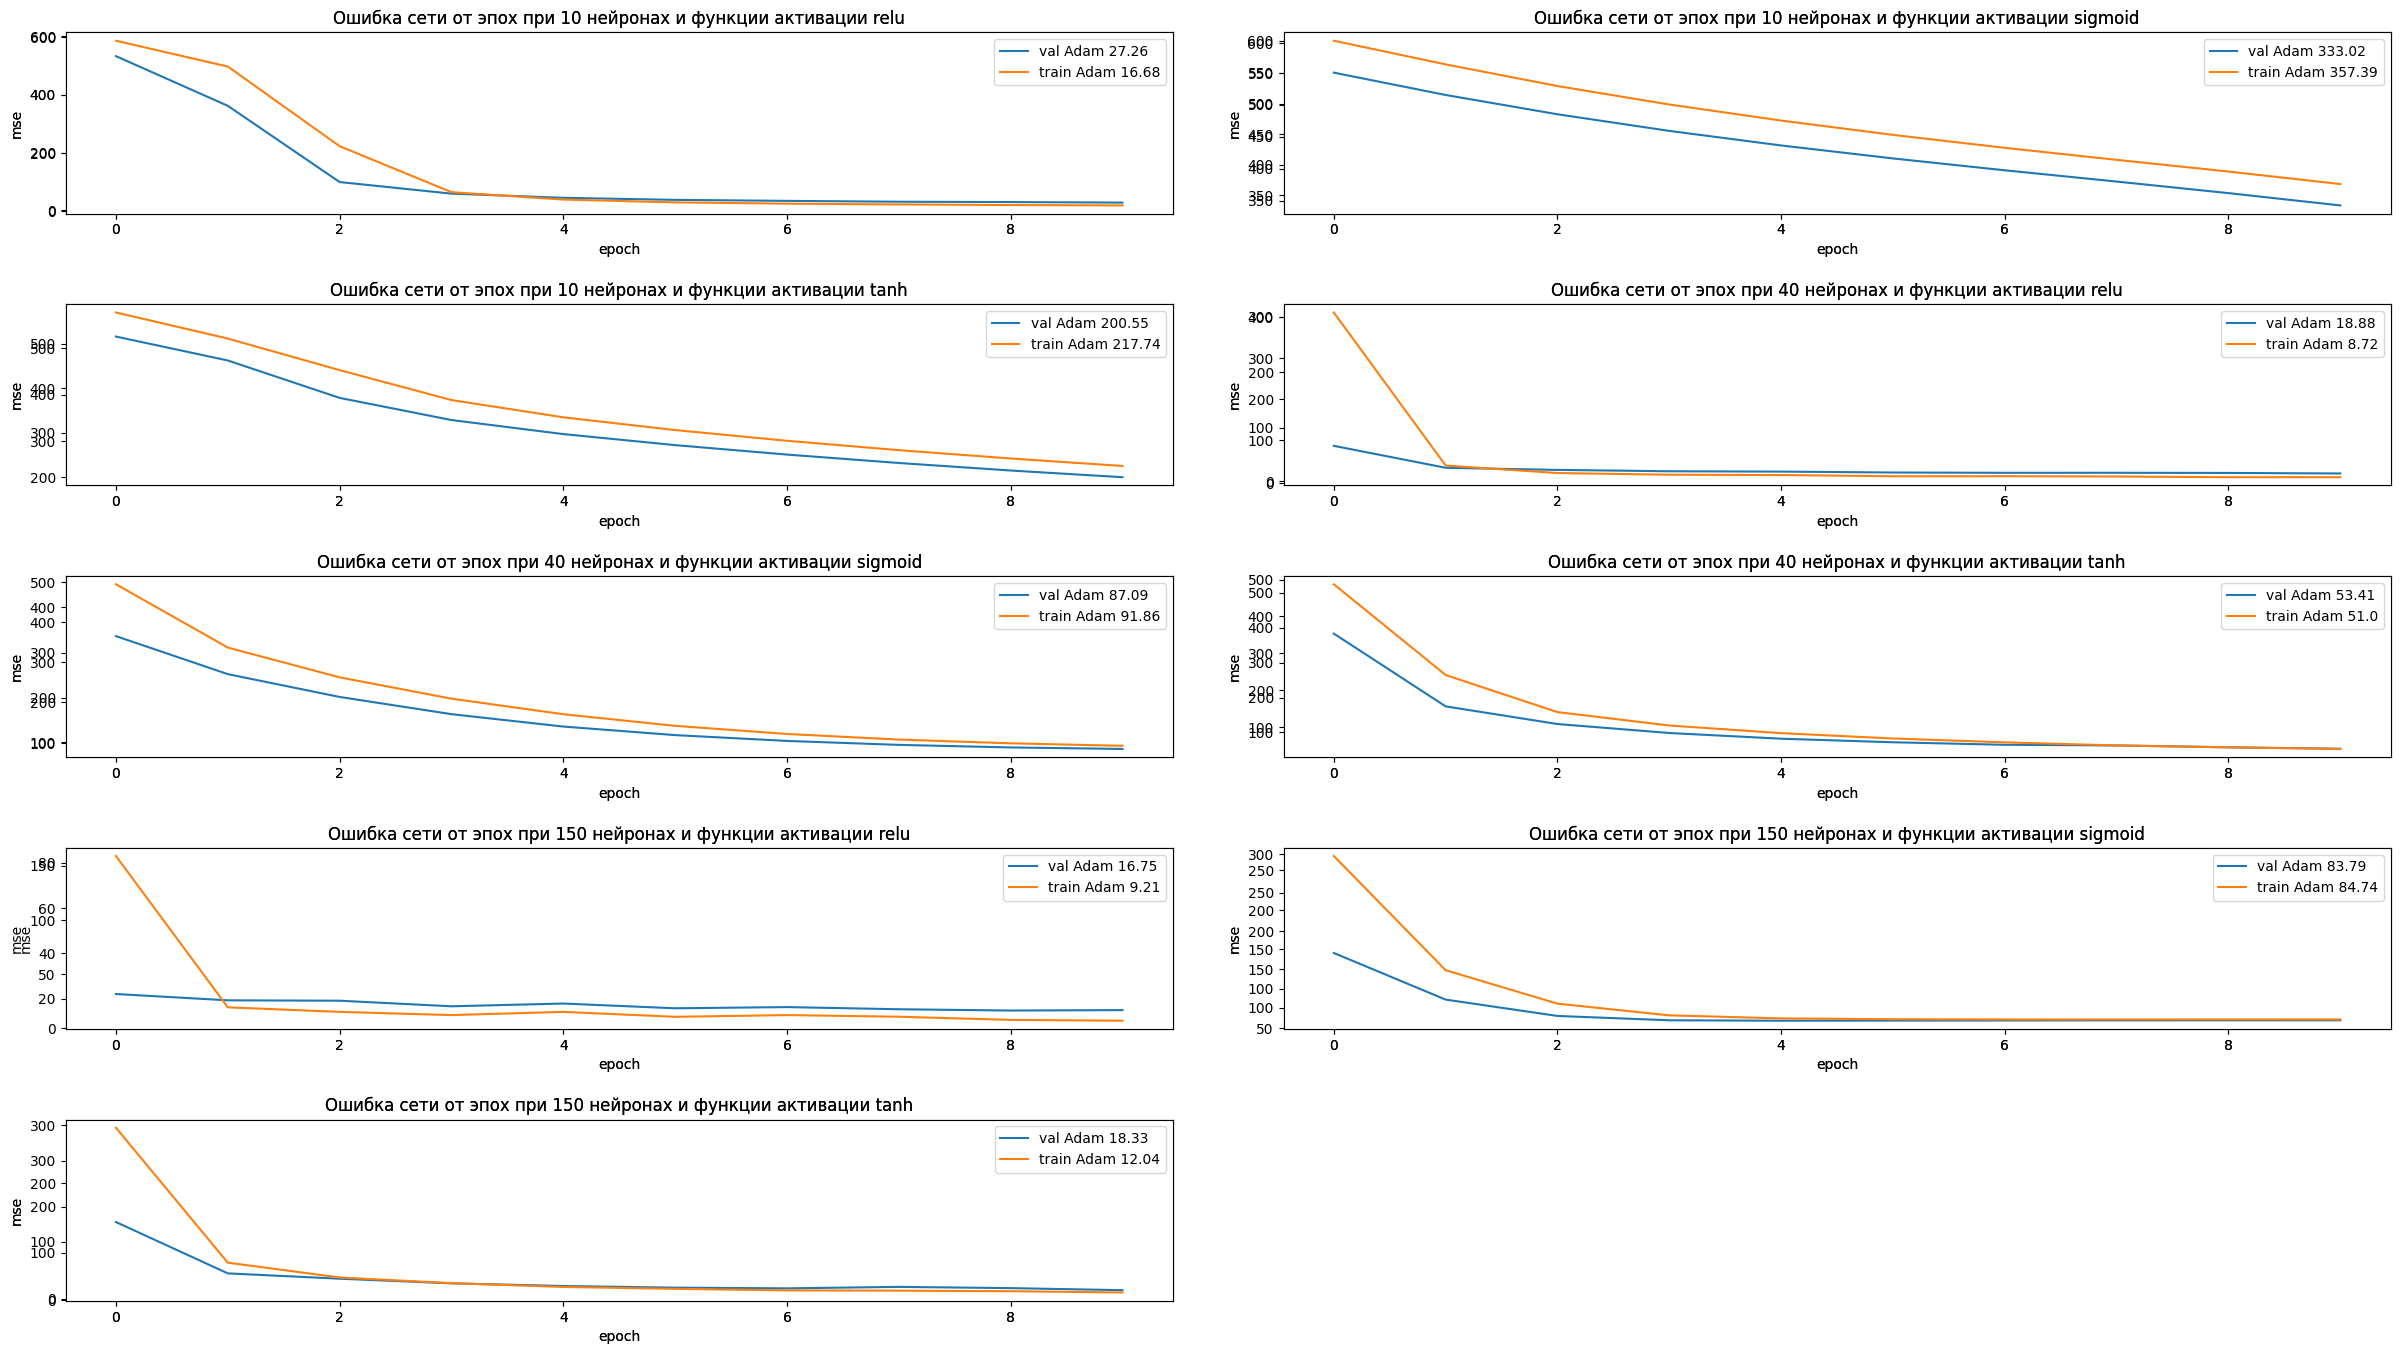

In [14]:
# Рассмотрим 6-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [10, 40, 150]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(6)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 6 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      x_5 = Dense(n, activation=f)(x_4)
      outputs = Dense(1)(x_5)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 10 слоёв, 10 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 14.9741 - mse: 14.9741 - 85ms/epoch - 7ms/step
5/5 - 0s - loss: 24.9946 - mse: 24.9946 - 144ms/epoch - 29ms/step

Параметры текущей нейронной сети: 10 слоёв, 10 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 13.4917 - mse: 13.4917 - 82ms/epoch - 7ms/step
5/5 - 0s - loss: 26.1388 - mse: 26.1388 - 72ms/epoch - 14ms/step

Параметры текущей нейронной сети: 10 слоёв, 10 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 394.4599 - mse: 394.4599 - 93ms/epoch - 8ms/step
5/5 - 0s - loss: 368.5438 - mse: 368.5438 - 81ms/epoch - 16ms/step

Параметры текущей нейронной сети: 10 слоёв, 10 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 345.5822 - mse: 345.5822 - 99ms/epoch - 8ms/step
5/5 - 0s - loss: 321.7168 - mse: 321.7168 - 113ms/epoch - 23ms/step

Параметры текущей нейронной сети: 10 слоёв, 1

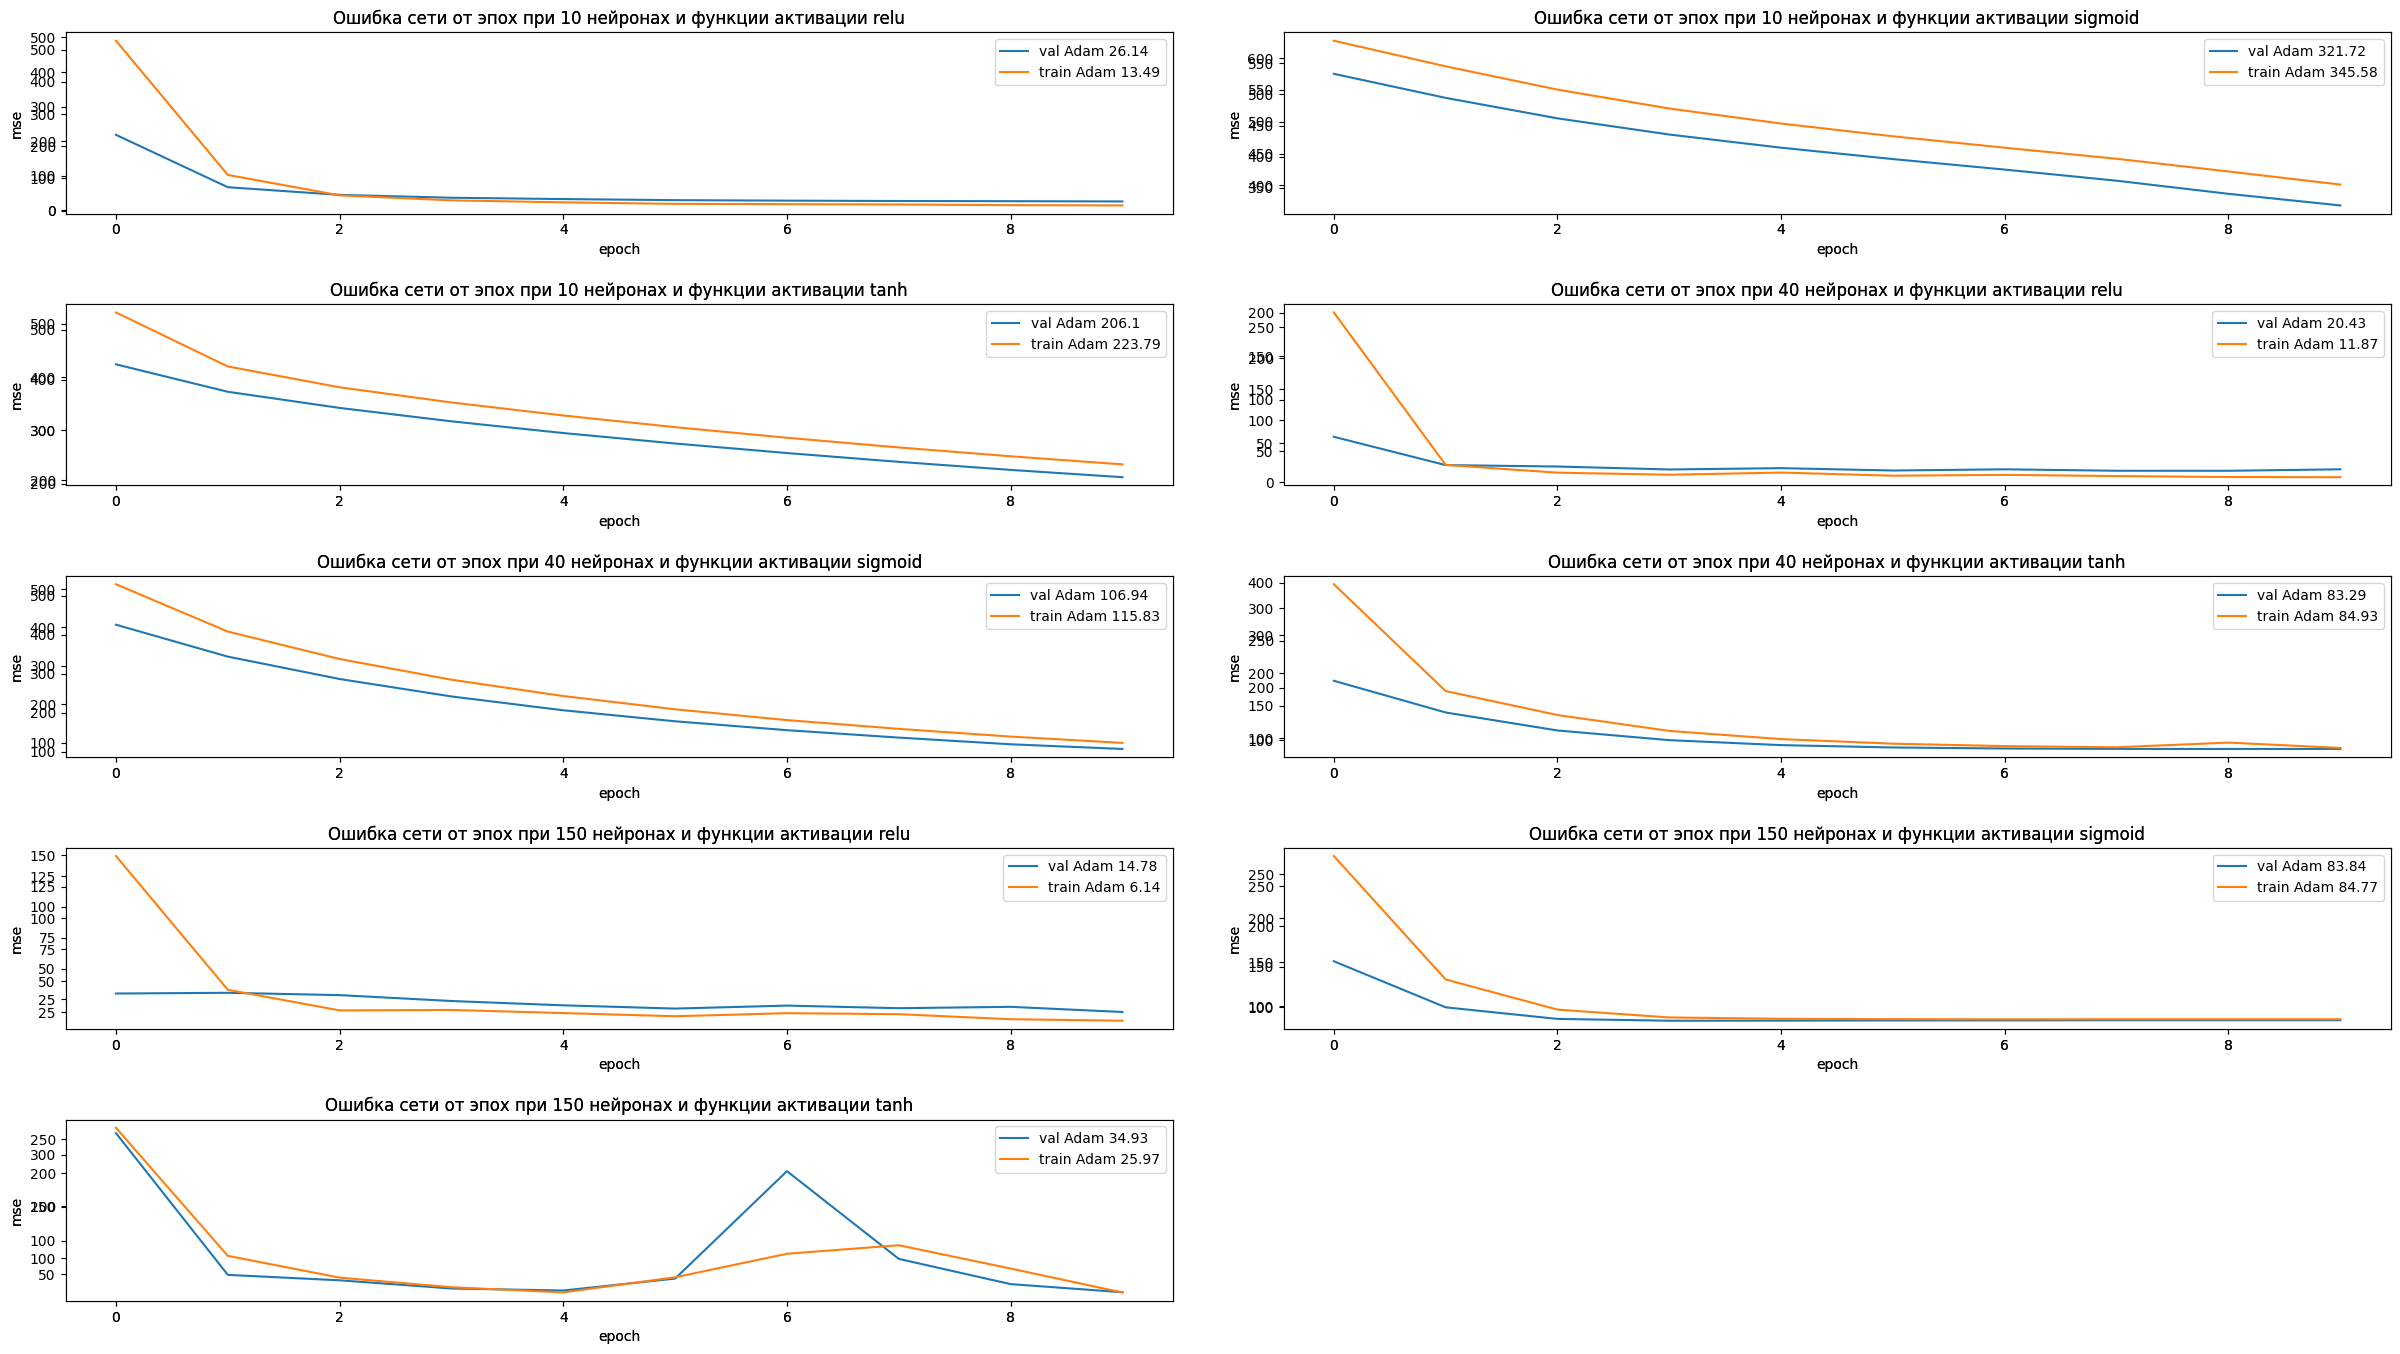

In [15]:
# Рассмотрим 12-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [10, 40, 150]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(12)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 10 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      x_5 = Dense(n, activation=f)(x_4)
      x_6 = Dense(n, activation=f)(x_5)
      x_7 = Dense(n, activation=f)(x_6)
      x_8 = Dense(n, activation=f)(x_7)
      x_9 = Dense(n, activation=f)(x_8)
      x_10 = Dense(n, activation=f)(x_9)
      x_11 = Dense(n, activation=f)(x_10)
      outputs = Dense(1)(x_11)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()

In [16]:
results['n_layers'] = n_layers
results['n_nums'] = n_nums
results['act_func'] = act_func
results['opt'] = opt
results['train_mse'] = train_mse
results['test_mse'] = test_mse
results['overtr_diff'] = results['test_mse'] - results['train_mse']

In [17]:
results.sort_values(by=['test_mse','overtr_diff'], ascending=[True, True])

,n_layers,n_nums,act_func,opt,train_mse,test_mse,overtr_diff
49,12,150,relu,Adam,6.142303,14.780447,8.638144
31,6,150,relu,Adam,9.207922,16.754465,7.546543
13,4,150,relu,Adam,8.456551,18.150846,9.694296
12,4,150,relu,RMSprop,9.362700,18.299835,8.937136
35,6,150,tanh,Adam,12.040447,18.328115,6.287668
25,6,40,relu,Adam,8.716304,18.875746,10.159442
43,12,40,relu,Adam,11.872946,20.428095,8.555149
24,6,40,relu,RMSprop,11.528765,21.133104,9.604340
34,6,150,tanh,RMSprop,12.403212,21.986639,9.583427
36,12,10,relu,RMSprop,14.974137,24.994596,10.020459


In [ ]:
При максимальном количестве слоев и нейронов самая минимальная ошибка . Обратное также верно .